  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

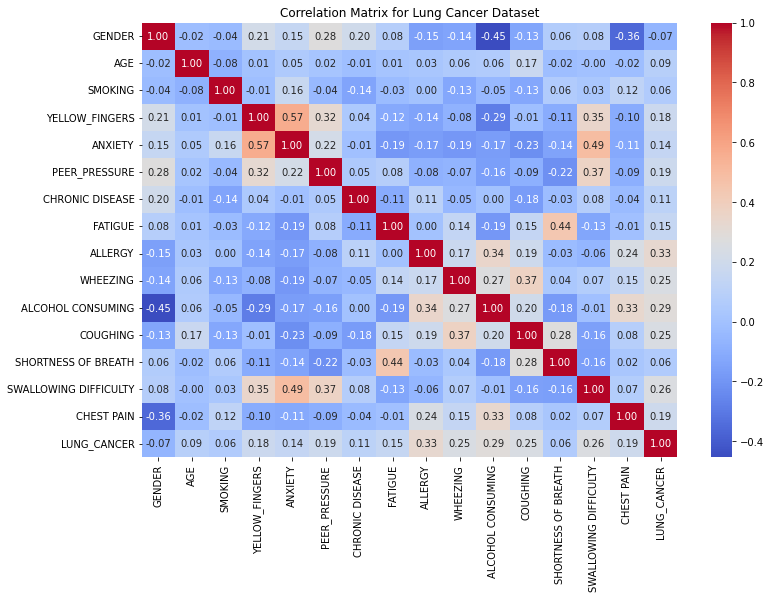

done
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Logistic Regression Accuracy: 0.967741935483871
Logistic Regression ROC-AUC: 0.925
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Decision Tree Accuracy: 0.967741935483871
Decision Tree ROC-AUC: 0.7416666666666667
done


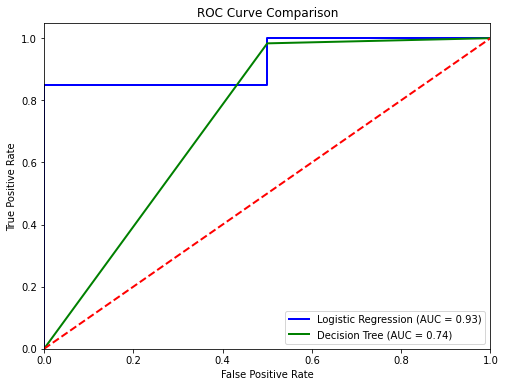

Logistic Regression Accuracy: 0.967741935483871
Logistic Regression ROC-AUC: 0.925
Decision Tree Accuracy: 0.967741935483871
Decision Tree ROC-AUC: 0.7416666666666667
done


In [1]:
import pandas as pd

# Load the dataset
lung_df = pd.read_csv('lung_cancer.csv')

# Print the first few rows of the dataframe
print(lung_df.head())

# Print info about dataframe
print(lung_df.info())
print('done')
import pandas as pd

# Preprocessing the lung_cancer dataset

# Strip whitespace from column names
lung_df.columns = [col.strip() for col in lung_df.columns]

# Check for missing values
missing = lung_df.isnull().sum()
print('Missing values per column:')
print(missing)

# Convert columns that are numeric in nature to numeric types (except GENDER and LUNG_CANCER)
numeric_cols = lung_df.columns.drop(['GENDER', 'LUNG_CANCER'])
for col in numeric_cols:
    lung_df[col] = pd.to_numeric(lung_df[col], errors='coerce')

# For GENDER, convert to binary (e.g., M=0, F=1)
lung_df['GENDER'] = lung_df['GENDER'].map({'M': 0, 'F': 1})

# For target LUNG_CANCER, convert to binary (YES=1, NO=0)
lung_df['LUNG_CANCER'] = lung_df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Check outsummary of preprocessing
print('\
Data types after conversion:')
print(lung_df.dtypes)

# Show the first few rows after preprocessing
print('\
First few rows after preprocessing:')
print(lung_df.head())
print('done')
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix for features vs target
corr_matrix = lung_df.corr()

# Display the correlation of each feature with the target variable LUNG_CANCER
corr_with_target = corr_matrix['LUNG_CANCER'].drop('LUNG_CANCER').sort_values(ascending=False)
print('Correlation of each feature with lung cancer:')
print(corr_with_target)

# Plot heatmap for the entire correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Lung Cancer Dataset')
plt.show()

print('done')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Define features and target
X = lung_df.drop('LUNG_CANCER', axis=1)
y = lung_df['LUNG_CANCER']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_logreg))
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Logistic Regression ROC-AUC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

# Model 2: Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Evaluate Decision Tree
print('\
Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dtree))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dtree))

# For ROC-AUC, check if predict_proba works
if hasattr(dtree, 'predict_proba'):
    print('Decision Tree ROC-AUC:', roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))
else:
    print('Decision Tree ROC-AUC cannot be calculated')

print('done')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_log = auc(fpr_log, tpr_log)

# Calculate ROC curve for Decision Tree
# Note: if it has predict_proba
if hasattr(dtree, 'predict_proba'):
    fpr_tree, tpr_tree, _ = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
    roc_auc_tree = auc(fpr_tree, tpr_tree)
else:
    fpr_tree, tpr_tree, roc_auc_tree = [None, None, None]

# Plotting ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
if fpr_tree is not None:
    plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print combined metrics
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Logistic Regression ROC-AUC:', roc_auc_log)

print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dtree))
if fpr_tree is not None:
    print('Decision Tree ROC-AUC:', roc_auc_tree)
else:
    print('Decision Tree ROC-AUC: N/A')

print('done')